# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("------------------------")

# Counter that states number of cities
counter = 1

# set up lists to hold reponse info
country =[]
lat = []
lon =[]
temp = []
humid = []
cloud = []
wind = []
cities_found = []
date = []
units = "imperial"

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f'Processing Record {counter} of set {counter} | {city}')
    
    counter += 1
    
    # Build partial query URL
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    try:
        weather_response = requests.get(query_url).json()
        # Print weather response
        country.append(weather_response['sys']['country'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        humid.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        cities_found.append(weather_response['name'])
        date.append(weather_response['dt'])
    except:
        print(f'City, {city} not found. Skipping...')
        
print("--------------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | kavieng
Processing Record 2 of set 2 | iqaluit
Processing Record 3 of set 3 | batemans bay
Processing Record 4 of set 4 | dryden
Processing Record 5 of set 5 | vestmannaeyjar
Processing Record 6 of set 6 | kodiak
Processing Record 7 of set 7 | teguise
Processing Record 8 of set 8 | ushuaia
Processing Record 9 of set 9 | novikovo
Processing Record 10 of set 10 | vaini
Processing Record 11 of set 11 | upernavik
Processing Record 12 of set 12 | mataura
Processing Record 13 of set 13 | salumbar
Processing Record 14 of set 14 | bluff
Processing Record 15 of set 15 | khatanga
Processing Record 16 of set 16 | araguacu
Processing Record 17 of set 17 | vao
Processing Record 18 of set 18 | georgetown
Processing Record 19 of set 19 | grindavik
Processing Record 20 of set 20 | padilla
Processing Record 21 of set 21 | tasiilaq
Processing Record 22 of set 22 | punta arenas
Processing Record 23 of set 23 | hilo
Processin

Processing Record 173 of set 173 | tautira
Processing Record 174 of set 174 | mayfield
Processing Record 175 of set 175 | kruisfontein
Processing Record 176 of set 176 | kamenskoye
City, kamenskoye not found. Skipping...
Processing Record 177 of set 177 | lingao
Processing Record 178 of set 178 | westport
Processing Record 179 of set 179 | mahajanga
Processing Record 180 of set 180 | alofi
Processing Record 181 of set 181 | okulovka
Processing Record 182 of set 182 | ostrovnoy
Processing Record 183 of set 183 | port-gentil
Processing Record 184 of set 184 | inhambane
Processing Record 185 of set 185 | bethel
Processing Record 186 of set 186 | waingapu
Processing Record 187 of set 187 | busselton
Processing Record 188 of set 188 | nakhon phanom
Processing Record 189 of set 189 | saint george
Processing Record 190 of set 190 | albion
Processing Record 191 of set 191 | wakkanai
Processing Record 192 of set 192 | puerto del rosario
Processing Record 193 of set 193 | zhanatas
City, zhanatas

Processing Record 349 of set 349 | ilhabela
Processing Record 350 of set 350 | verkhnyaya inta
Processing Record 351 of set 351 | pangnirtung
Processing Record 352 of set 352 | ulu-telyak
Processing Record 353 of set 353 | esperance
Processing Record 354 of set 354 | wagar
Processing Record 355 of set 355 | sept-iles
Processing Record 356 of set 356 | sarkand
Processing Record 357 of set 357 | sterling
Processing Record 358 of set 358 | kiama
Processing Record 359 of set 359 | ambon
Processing Record 360 of set 360 | el coyote
Processing Record 361 of set 361 | soyo
Processing Record 362 of set 362 | ballarat
Processing Record 363 of set 363 | komsomolskiy
Processing Record 364 of set 364 | dzhusaly
City, dzhusaly not found. Skipping...
Processing Record 365 of set 365 | zapolyarnyy
Processing Record 366 of set 366 | sinnamary
Processing Record 367 of set 367 | muroto
Processing Record 368 of set 368 | beloha
Processing Record 369 of set 369 | diego de almagro
Processing Record 370 of 

Processing Record 523 of set 523 | faya
Processing Record 524 of set 524 | evans
Processing Record 525 of set 525 | hofn
Processing Record 526 of set 526 | mayo
Processing Record 527 of set 527 | sao felix do xingu
Processing Record 528 of set 528 | olafsvik
Processing Record 529 of set 529 | nehe
Processing Record 530 of set 530 | longfeng
Processing Record 531 of set 531 | katherine
Processing Record 532 of set 532 | qaqortoq
Processing Record 533 of set 533 | pilao arcado
City, pilao arcado not found. Skipping...
Processing Record 534 of set 534 | aklavik
Processing Record 535 of set 535 | hobyo
Processing Record 536 of set 536 | copiapo
Processing Record 537 of set 537 | antofagasta
Processing Record 538 of set 538 | marawi
Processing Record 539 of set 539 | calama
Processing Record 540 of set 540 | filadelfia
Processing Record 541 of set 541 | ouargaye
Processing Record 542 of set 542 | acarau
Processing Record 543 of set 543 | ukiah
Processing Record 544 of set 544 | nizhniy odes

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create Data Frame
weather_dict = {"Country": country,
              "Lat": lat,
              "Lon": lon,
              "Temp": temp,
              "Humidity": humid,
              "Cloudiness": cloud,
              "Wind Speed": wind,
              "City": cities_found,
              "Date": date
              }

weather_df = pd.DataFrame(weather_dict)

# Export to CSV
weather_df.head()

,Country,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,City,Date
0,PG,-2.57,150.80,84.60,74,25,13.06,Kavieng,1595651069
1,CA,63.75,-68.51,45.14,75,90,3.36,Iqaluit,1595651056
2,AU,-35.72,150.18,59.14,72,44,3.96,Batemans Bay,1595651621
3,CA,49.78,-92.75,80.60,78,75,9.17,Dryden,1595651621
4,IS,63.44,-20.27,47.82,70,0,10.25,Vestmannaeyjar,1595651622


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
humidity_over100 = weather_df.loc[weather_df["Humidity"] >100]
humidity_over100.head(25)

,Country,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,City,Date


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = weather_df.drop(weather_df.loc[weather_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,Country,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,City,Date
0,PG,-2.57,150.80,84.60,74,25,13.06,Kavieng,1595651069
1,CA,63.75,-68.51,45.14,75,90,3.36,Iqaluit,1595651056
2,AU,-35.72,150.18,59.14,72,44,3.96,Batemans Bay,1595651621
3,CA,49.78,-92.75,80.60,78,75,9.17,Dryden,1595651621
4,IS,63.44,-20.27,47.82,70,0,10.25,Vestmannaeyjar,1595651622


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

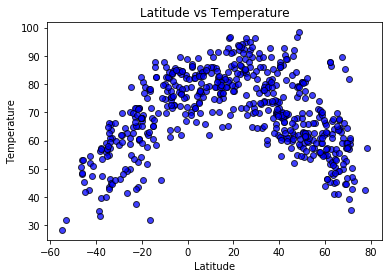

In [7]:
# Scatter Plot Latitude vs Temperature
plt.scatter(weather_df['Lat'], weather_df['Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

## Latitude vs. Humidity Plot

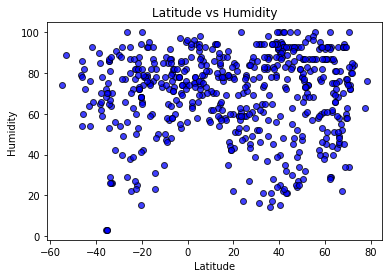

In [8]:
# Scatter Plot Latitude vs Humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

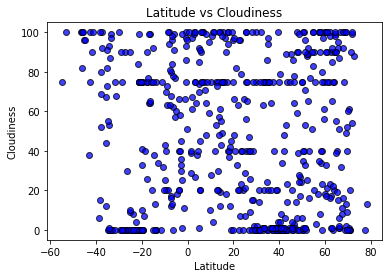

In [9]:
# Scatter Plot Latitude vs Cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

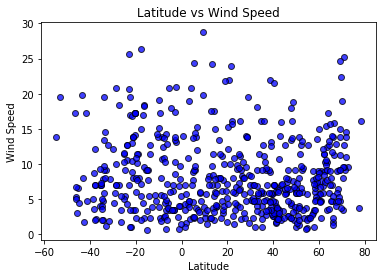

In [10]:
# Scatter Plot Latitude vs Temperature
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [11]:
# Create Northern & Southern Hemisphere DataFrames
northern_df = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
northern_df.head()
southern_df.head()

,Country,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,City,Date
0,PG,-2.57,150.80,84.60,74,25,13.06,Kavieng,1595651069
2,AU,-35.72,150.18,59.14,72,44,3.96,Batemans Bay,1595651621
7,AR,-54.80,-68.30,28.40,74,75,13.87,Ushuaia,1595650921
9,TO,-21.20,-175.20,71.60,88,75,8.05,Vaini,1595651062
11,NZ,-46.19,168.86,48.04,86,100,5.28,Mataura,1595651061


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5691163388857752


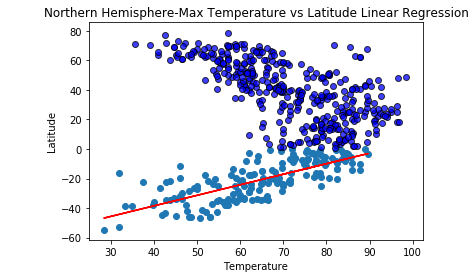

In [12]:
# Northern Hemisphere-Max Temp vs Latitude Linear Regression
x_values = southern_df['Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(northern_df['Temp'], northern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Northern Hemisphere-Max Temperature vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5691163388857752


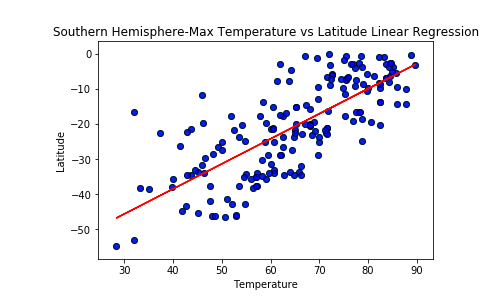

In [13]:
# Southern Hemisphere-Max Temp vs Latitude Linear Regression
x_values = southern_df['Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(southern_df['Temp'], southern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Southern Hemisphere-Max Temperature vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0035412307056155606


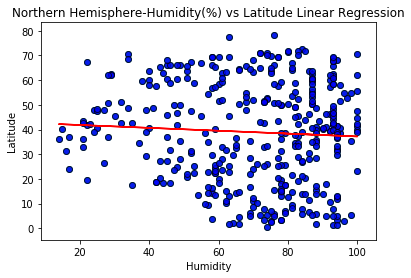

In [14]:
# Northern Hemisphere-Humidity(%) vs Latitude Linear Regression
x_values = northern_df['Humidity']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(northern_df['Humidity'], northern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Northern Hemisphere-Humidity(%) vs Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.019688660680812122


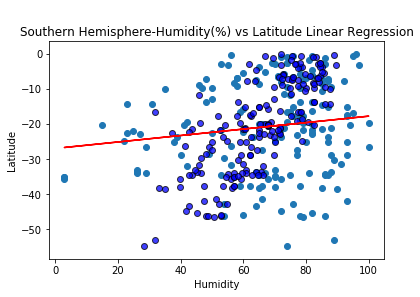

In [15]:
# Southern Hemisphere-Humidity(%) vs Latitude Linear Regression
x_values = southern_df['Humidity']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(southern_df['Temp'], southern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Southern Hemisphere-Humidity(%) vs Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.009081542220766807


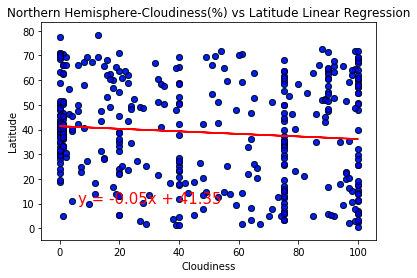

In [16]:
# Northern Hemisphere-Cloudiness(%) vs Latitude Linear Regression
x_values = northern_df['Cloudiness']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(northern_df['Cloudiness'], northern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Northern Hemisphere-Cloudiness(%) vs Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0024997197559252387


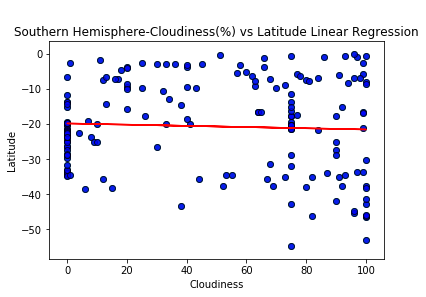

In [17]:
# Southern Hemisphere-Cloudiness(%) vs Latitude Linear Regression
x_values = southern_df['Cloudiness']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(southern_df['Cloudiness'], southern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Southern Hemisphere-Cloudiness(%) vs Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0008978036663452785


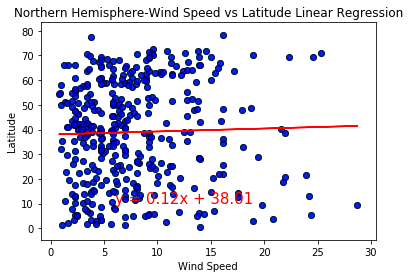

In [18]:
# Northern Hemisphere-Wind Speed (mph) vs Latitude Linear Regression
x_values = northern_df['Wind Speed']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(northern_df['Wind Speed'], northern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Northern Hemisphere-Wind Speed vs Latitude Linear Regression")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0003063226251001346


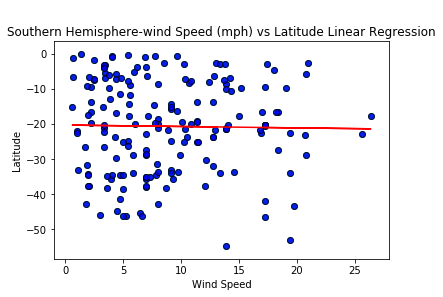

In [19]:
# Southern Hemisphere-Wind Speed (mph) vs Latitude Linear Regression
x_values = southern_df['Wind Speed']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(southern_df['Wind Speed'], southern_df['Lat'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
print(f"R squared: {rvalue**2}")
plt.title("Southern Hemisphere-wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.show()